In [5]:
28*800

22400

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io
# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

%load_ext autoreload
%autoreload 2

In [2]:
train_labels = pd.read_csv("data/train.csv")
train_labels.head()

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


In [3]:
train_labels.shape

(31072, 2)

In [4]:
31072*0.7

21750.399999999998

In [4]:
fnames = os.listdir('data/train/')
len(fnames)

124288

In [5]:
fnames

['38079cfe-bbc5-11e8-b2bc-ac1f6b6435d0_blue.png',
 'f493ebd6-bbc3-11e8-b2bc-ac1f6b6435d0_green.png',
 'a60e087a-bbaa-11e8-b2ba-ac1f6b6435d0_red.png',
 '3bd89da8-bbbe-11e8-b2ba-ac1f6b6435d0_red.png',
 '9015588c-bbc0-11e8-b2bb-ac1f6b6435d0_green.png',
 'f2ba4dac-bbc1-11e8-b2bb-ac1f6b6435d0_blue.png',
 '3903bc54-bbb7-11e8-b2ba-ac1f6b6435d0_red.png',
 'cde411a2-bbc1-11e8-b2bb-ac1f6b6435d0_green.png',
 '96ec137a-bbbc-11e8-b2ba-ac1f6b6435d0_red.png',
 'c9e8bba8-bba2-11e8-b2b9-ac1f6b6435d0_green.png',
 '78fcf694-bbb3-11e8-b2ba-ac1f6b6435d0_blue.png',
 'beb206b6-bbc7-11e8-b2bc-ac1f6b6435d0_yellow.png',
 'd77f76ee-bbac-11e8-b2ba-ac1f6b6435d0_yellow.png',
 'a18e3a48-bbca-11e8-b2bc-ac1f6b6435d0_blue.png',
 '17aa1460-bbab-11e8-b2ba-ac1f6b6435d0_yellow.png',
 '91966dc6-bba8-11e8-b2ba-ac1f6b6435d0_blue.png',
 '36e8c8e0-bbb9-11e8-b2ba-ac1f6b6435d0_green.png',
 'd429c208-bbc3-11e8-b2bc-ac1f6b6435d0_blue.png',
 'bdd8e2ce-bb99-11e8-b2b9-ac1f6b6435d0_yellow.png',
 '82fee322-bba5-11e8-b2ba-ac1f6b6435d0_bl

In [6]:
colors = set(os.path.splitext(fname)[0].split('_')[-1] for fname in fnames)
colors = list(colors)
colors

['green', 'blue', 'yellow', 'red']

In [7]:
assert train_labels.shape[0]*len(colors) == len(fnames)

https://www.kaggle.com/allunia/protein-atlas-exporation-and-baseline/notebook

In [8]:
label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}

def fill_targets(row):
    target_list = row.Target.split(" ")
    for num in target_list:
        name = label_names[int(num)]
        row.loc[name] = 1
    return row

In [9]:
for key in label_names.keys():
    train_labels[label_names[key]] = 0

In [10]:
train_labels = train_labels.apply(fill_targets, axis=1)
train_labels.head()

,Id,Target,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,Peroxisomes,Endosomes,Lysosomes,Intermediate filaments,Actin filaments,Focal adhesion sites,Microtubules,Microtubule ends,Cytokinetic bridge,Mitotic spindle,Microtubule organizing center,Centrosome,Lipid droplets,Plasma membrane,Cell junctions,Mitochondria,Aggresome,Cytosol,Cytoplasmic bodies,Rods & rings
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


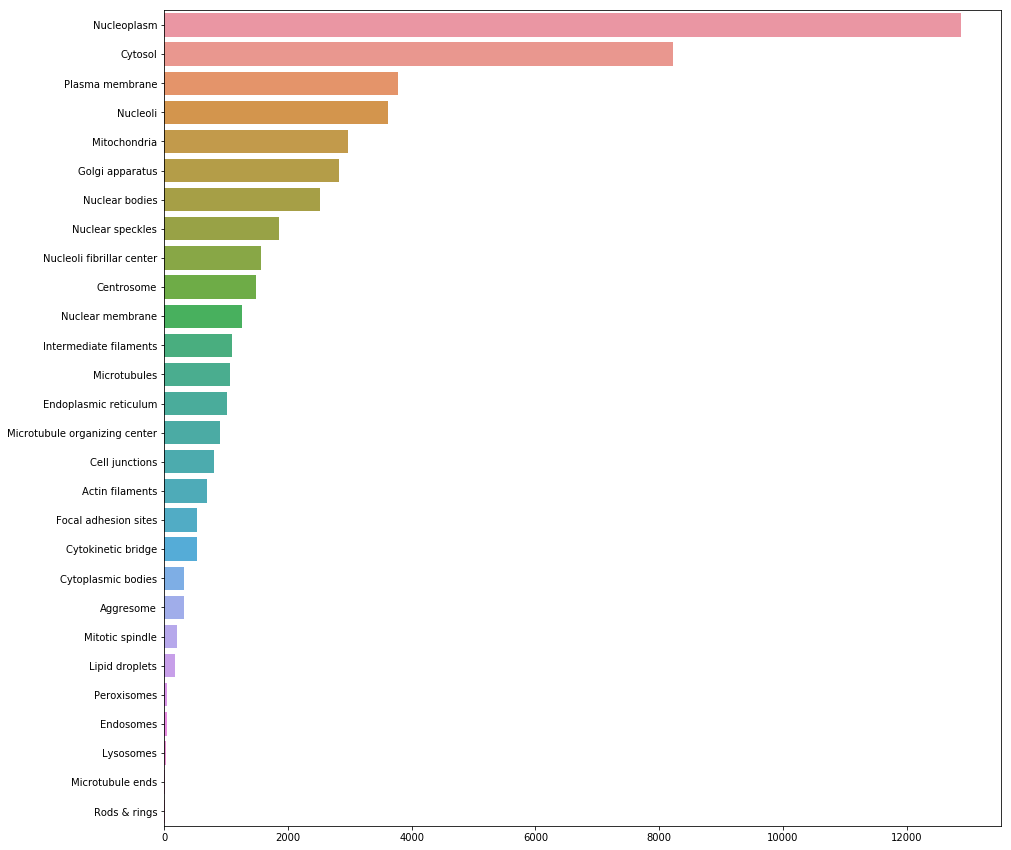

In [11]:
target_counts = train_labels.drop(["Id", "Target"],axis=1).sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(y=target_counts.index.values, x=target_counts.values, order=target_counts.index)

In [12]:
target_counts.index.values[-1]

'Rods & rings'

https://www.kaggle.com/jschnab/exploring-the-human-protein-atlas-images

In [13]:
#create custom color maps
cdict1 = {'red':   ((0.0,  0.0, 0.0),
                   (1.0,  0.0, 0.0)),

         'green': ((0.0,  0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'blue':  ((0.0,  0.0, 0.0),
                   (1.0,  0.0, 0.0))}

cdict2 = {'red':   ((0.0,  0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'green': ((0.0,  0.0, 0.0),
                   (1.0,  0.0, 0.0)),

         'blue':  ((0.0,  0.0, 0.0),
                   (1.0,  0.0, 0.0))}

cdict3 = {'red':   ((0.0,  0.0, 0.0),
                   (1.0,  0.0, 0.0)),

         'green': ((0.0,  0.0, 0.0),
                   (1.0,  0.0, 0.0)),

         'blue':  ((0.0,  0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0))}

cdict4 = {'red': ((0.0,  0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'green': ((0.0,  0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'blue':  ((0.0,  0.0, 0.0),
                   (1.0,  0.0, 0.0))}

plt.register_cmap(name='greens', data=cdict1)
plt.register_cmap(name='reds', data=cdict2)
plt.register_cmap(name='blues', data=cdict3)
plt.register_cmap(name='yellows', data=cdict4)

In [14]:
def PlotStack(fname, ax):
    x1 = io.imread(fname + '_green.png')
    x2 = io.imread(fname + '_blue.png')
    x3 = io.imread(fname + '_yellow.png')
    x4 = io.imread(fname + '_red.png')
#     print(x1.shape, x1.max(), x1.min())
    ax.imshow(x1, alpha=0.25, cmap="greens")
    ax.imshow(x2, alpha=0.25, cmap="blues")
    ax.imshow(x3, alpha=0.25, cmap="yellows")
    ax.imshow(x4, alpha=0.25, cmap="reds")

000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0: 7 1 2 0


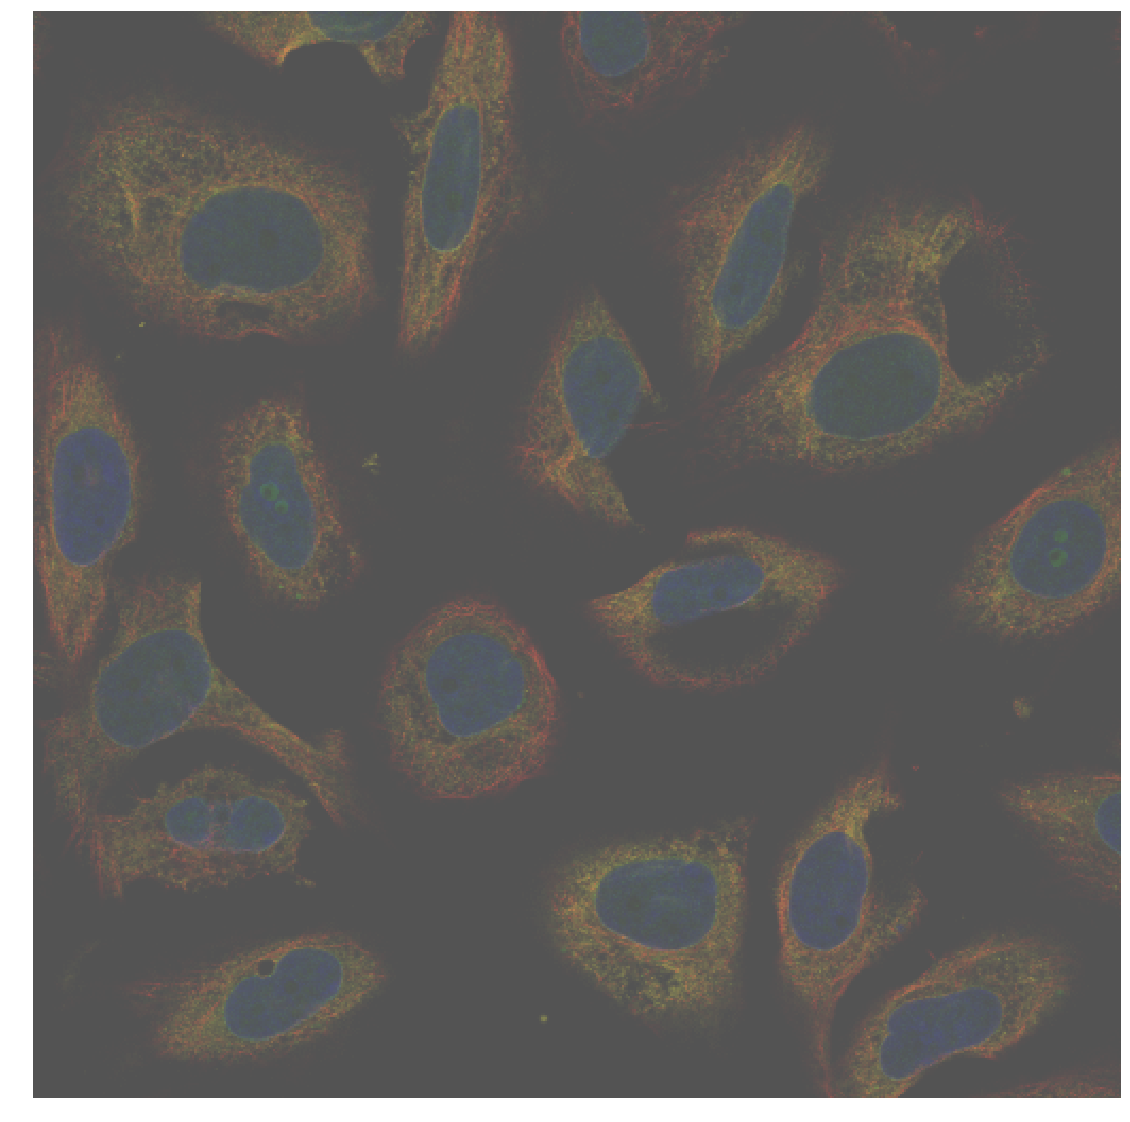

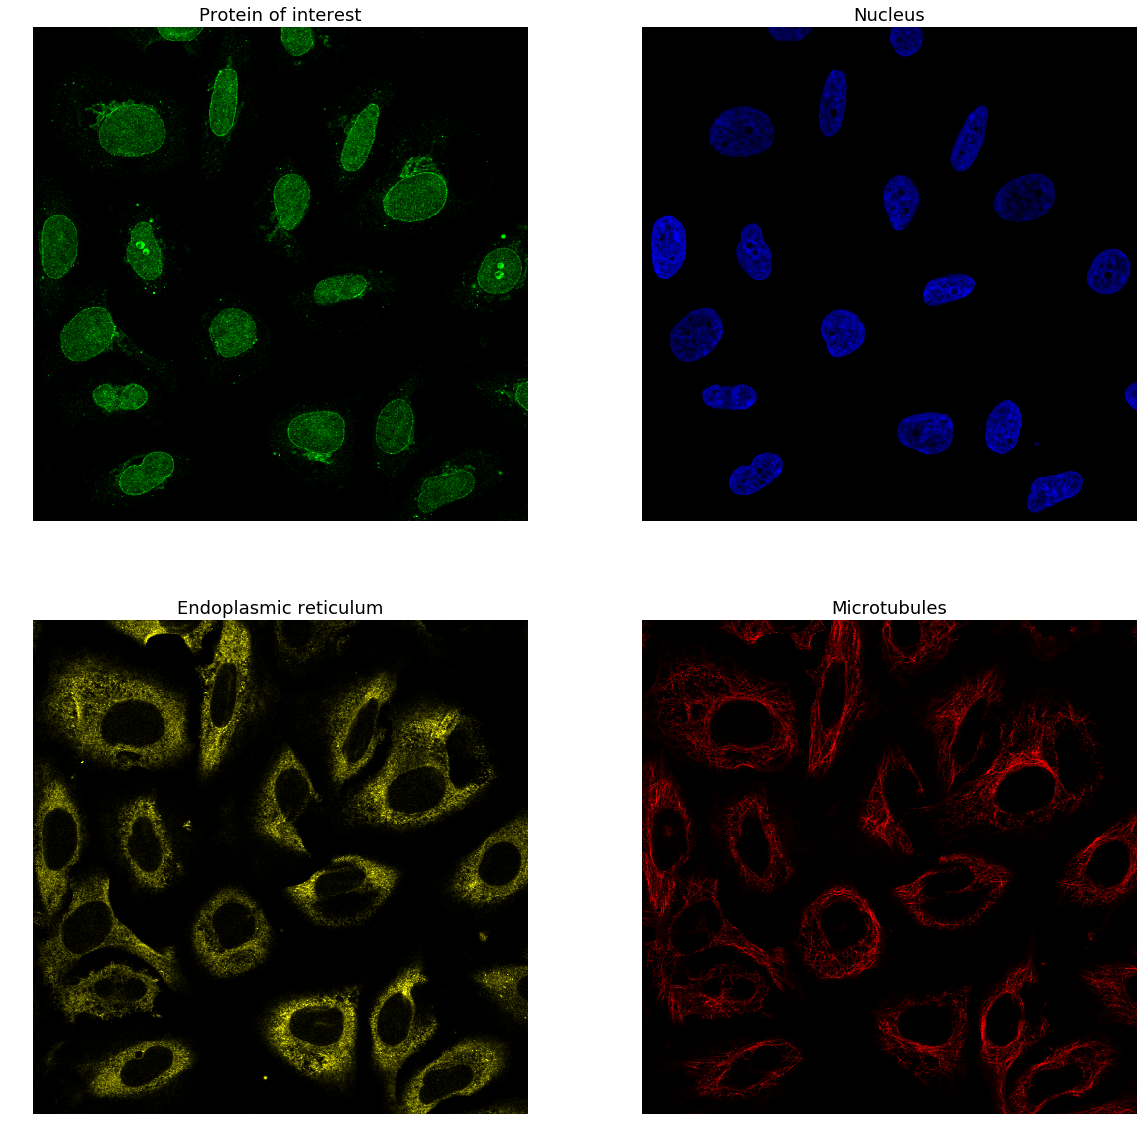

In [15]:
fnames = train_labels.Id.values
targets = train_labels.Target.values
ID = 1 
fname = fnames[ID]
target = targets[ID]
print('{}: {}'.format(fname, target))
fname = os.path.join('data','train', fname)

fig, axs = plt.subplots(sharex=True, sharey=True, figsize=(20, 20))
PlotStack(fname, axs)
axs.axis('off')

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(20, 20))
axs = axs.flatten()

axs[0].imshow(io.imread(fname + '_green.png'), cmap="greens")
axs[0].axis('off')
axs[0].set_title("Protein of interest", fontsize=18)

axs[1].imshow(io.imread(fname + '_blue.png'), cmap="blues")
axs[1].axis('off')
axs[1].set_title("Nucleus", fontsize=18)

axs[2].imshow(io.imread(fname + '_yellow.png'), cmap="yellows")
axs[2].axis('off')
axs[2].set_title("Endoplasmic reticulum", fontsize=18)

axs[3].imshow(io.imread(fname + '_red.png'), cmap="reds")
axs[3].axis('off')
axs[3].set_title("Microtubules", fontsize=18)

plt.show()

In [16]:
from PIL import Image

In [17]:
img = Image.open(fname + '_green.png')
img.size

(512, 512)

In [18]:
img = Image.open('assets/juri.jpg')
img.size

(400, 400)

In [19]:
img = np.array(img)

In [20]:
img.shape

(400, 400, 3)

In [21]:
train_labels.Target.values[5][:2]

'0'

In [22]:
for _ in range(10):
    print(np.random.choice([2,5]))

5
2
5
5
2
5
5
2
2
2


In [23]:
from utils import compute_mean_std

In [45]:
compute_mean_std(data_dir='data/')

  0%|          | 60/31072 [00:00<01:41, 305.94it/s, mean=0.023, std=0.582]

red :  mean 0.084, std 0.133


  0%|          | 63/31072 [00:00<01:39, 310.24it/s, mean=0.025, std=0.589]

green :  mean 0.058, std 0.091


  0%|          | 50/31072 [00:00<02:01, 255.36it/s, mean=0.032, std=0.649]

blue :  mean 0.056, std 0.141


100%|██████████| 31072/31072 [02:00<00:00, 258.68it/s, mean=0.085, std=0.128]

yellow :  mean 0.085, std 0.128


### Test data_loader

In [7]:
from model.data_loader import fetch_dataloader
from utils import get_config_from_json
import pandas as pd
import os
import numpy as np

In [8]:
data_dir = 'data/'
types = ['train', 'val']

In [10]:
params = get_config_from_json('experiments/base_model/params.json')
params.num_workers = 4
params.cuda = True

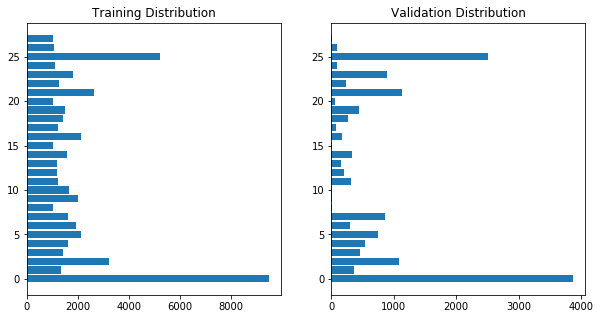

In [16]:
dl = fetch_dataloader(types, data_dir, params)

In [22]:
32.0 * 15

480.0

In [23]:
1750*16

28000

In [25]:
224/32, 480//32

(7.0, 15)

In [26]:
1750/2.4/60

12.152777777777779

In [50]:
traindl, valdl = dl['train'], dl['val']

In [51]:
traindl

In [52]:
imgs, labels = iter(traindl).next()

In [53]:
imgs.shape

torch.Size([32, 3, 224, 224])

In [54]:
imgs.max()

tensor(10.3516)

In [55]:
imgs.min()

tensor(-0.6374)

In [56]:
imgs.mean()

tensor(0.0719)

In [57]:
imgs.std()

tensor(1.1500)

In [61]:
from sklearn.metrics import f1_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
f1_score(y_true, y_pred, average='macro') 

0.26666666666666666

In [62]:
import torch

In [77]:
state_dict = torch.load(os.path.expanduser('~/.torch/models/densenet121-a639ec97.pth'))

In [78]:
for key in state_dict:
    print(key)

features.conv0.weight
features.norm0.weight
features.norm0.bias
features.norm0.running_mean
features.norm0.running_var
features.denseblock1.denselayer1.norm.1.weight
features.denseblock1.denselayer1.norm.1.bias
features.denseblock1.denselayer1.norm.1.running_mean
features.denseblock1.denselayer1.norm.1.running_var
features.denseblock1.denselayer1.conv.1.weight
features.denseblock1.denselayer1.norm.2.weight
features.denseblock1.denselayer1.norm.2.bias
features.denseblock1.denselayer1.norm.2.running_mean
features.denseblock1.denselayer1.norm.2.running_var
features.denseblock1.denselayer1.conv.2.weight
features.denseblock1.denselayer2.norm.1.weight
features.denseblock1.denselayer2.norm.1.bias
features.denseblock1.denselayer2.norm.1.running_mean
features.denseblock1.denselayer2.norm.1.running_var
features.denseblock1.denselayer2.conv.1.weight
features.denseblock1.denselayer2.norm.2.weight
features.denseblock1.denselayer2.norm.2.bias
features.denseblock1.denselayer2.norm.2.running_mean
feat

In [68]:
type(state_dict)

collections.OrderedDict

In [66]:
from model.net import densenet121

In [70]:
model = densenet121(pretrained=True, state_dict=state_dict, num_classes=28)

In [73]:
model.classifier.weight.shape

torch.Size([28, 1024])

In [74]:
model.classifier.bias.shape

torch.Size([28])

In [84]:
model.features.training = True
for n, p in model.features.named_parameters():
    if '.norm' in n:
        print(n, p.shape)

denseblock1.denselayer1.norm1.weight torch.Size([64])
denseblock1.denselayer1.norm1.bias torch.Size([64])
denseblock1.denselayer1.norm2.weight torch.Size([128])
denseblock1.denselayer1.norm2.bias torch.Size([128])
denseblock1.denselayer2.norm1.weight torch.Size([96])
denseblock1.denselayer2.norm1.bias torch.Size([96])
denseblock1.denselayer2.norm2.weight torch.Size([128])
denseblock1.denselayer2.norm2.bias torch.Size([128])
denseblock1.denselayer3.norm1.weight torch.Size([128])
denseblock1.denselayer3.norm1.bias torch.Size([128])
denseblock1.denselayer3.norm2.weight torch.Size([128])
denseblock1.denselayer3.norm2.bias torch.Size([128])
denseblock1.denselayer4.norm1.weight torch.Size([160])
denseblock1.denselayer4.norm1.bias torch.Size([160])
denseblock1.denselayer4.norm2.weight torch.Size([128])
denseblock1.denselayer4.norm2.bias torch.Size([128])
denseblock1.denselayer5.norm1.weight torch.Size([192])
denseblock1.denselayer5.norm1.bias torch.Size([192])
denseblock1.denselayer5.norm2.we

In [27]:
import torch

In [28]:
state = torch.load('experiments/base_model/best.pth.tar')

In [29]:
state.keys()

dict_keys(['epoch', 'state_dict', 'optim_dict'])

In [31]:
state['optim_dict'].keys()

dict_keys(['state', 'param_groups'])

In [35]:
state['optim_dict']['param_groups']

[{'lr': 0.0001,
  'betas': (0.9, 0.999),
  'eps': 1e-08,
  'weight_decay': 0,
  'amsgrad': False,
  'params': [139763828918384,
   139763828918456,
   139763952078784,
   139763828765104,
   139763828765176,
   139763828765464,
   139763828765536,
   139763828765608,
   139763828765896,
   139763828765968,
   139763828766040,
   139763828766328,
   139763828766400,
   139763828766472,
   139763828766760,
   139763828766832,
   139763828766904,
   139763828767192,
   139763828767264,
   139763828767336,
   139763828767624,
   139763828767696,
   139763828767768,
   139763828768056,
   139763828768128,
   139763828768200,
   139763828768488,
   139763828768560,
   139763828768632,
   139763828957400,
   139763828957472,
   139763828957544,
   139763828957832,
   139763828957904,
   139763828957976,
   139763828958264,
   139763828958336,
   139763828958408,
   139763828958696,
   139763828958768,
   139763828958840,
   139763828959128,
   139763828959200,
   139763828959272,
   139763828

In [36]:
state['optim_dict']['state'][139763828118584]

{'step': 1752,
 'exp_avg': tensor([[ 5.3963e-12,  7.8105e-07,  5.1650e-09,  ...,  7.5183e-04,
           2.4988e-04,  1.0388e-03],
         [ 1.8068e-10,  4.4813e-07,  5.2759e-08,  ...,  2.6307e-04,
           8.9240e-05,  3.0263e-04],
         [ 1.4774e-10,  7.5280e-08,  1.7525e-07,  ..., -1.8953e-04,
          -1.5428e-04, -1.2586e-03],
         ...,
         [-1.6061e-10, -4.5802e-08, -5.9882e-07,  ..., -1.1013e-03,
          -1.7192e-05, -6.6621e-04],
         [ 4.4578e-11,  1.8109e-07, -3.8238e-08,  ...,  5.0411e-05,
           3.6166e-04, -2.8296e-05],
         [ 1.3023e-12, -7.0664e-08, -3.7137e-08,  ..., -1.7957e-04,
          -5.3745e-05, -5.8587e-05]], device='cuda:0'),
 'exp_avg_sq': tensor([[6.9051e-13, 3.1385e-11, 1.2697e-11,  ..., 1.6527e-05, 3.0219e-06,
          9.1264e-06],
         [1.2920e-13, 9.0746e-12, 3.3219e-12,  ..., 2.5223e-06, 5.1456e-07,
          1.4419e-06],
         [3.1167e-13, 1.2436e-11, 5.6355e-12,  ..., 5.6945e-06, 1.1749e-06,
          4.1211e-06],


In [39]:
30 * 584/3.5/60

83.42857142857142

In [48]:
output_batch = np.random.randn(5)
output_batch = (output_batch > 0).astype(np.int32)
output_batch

array([1, 1, 0, 0, 1], dtype=int32)

In [50]:
' '.join(str(v) for v in np.nonzero(output_batch)[0].tolist())

'0 1 4'

In [51]:
test_df = pd.read_csv('data/sample_submission.csv')
test_df.head()

,Id,Predicted
0,00008af0-bad0-11e8-b2b8-ac1f6b6435d0,0
1,0000a892-bacf-11e8-b2b8-ac1f6b6435d0,0
2,0006faa6-bac7-11e8-b2b7-ac1f6b6435d0,0
3,0008baca-bad7-11e8-b2b9-ac1f6b6435d0,0
4,000cce7e-bad4-11e8-b2b8-ac1f6b6435d0,0


In [52]:
test_df.shape

(11702, 2)

In [57]:
import datetime
datetime.datetime.now()

datetime.datetime(2018, 10, 8, 11, 48, 11, 213523)

AttributeError: 'builtin_function_or_method' object has no attribute 'now'